# **5. Estadística Inferencial**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [95]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [96]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 5
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia
(4) finanzas


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [97]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 13
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) primeras_100_filas_anemia.xlsx
(10) primeras_100_filas_anemia.gsheet
(11) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(12) analisis_datos.docx


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [98]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [99]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [100]:
excel_data_file = "/content/drive/MyDrive//Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [101]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [102]:
data_interes = df_excel[[ "rxn_solar", "hr", "temp_aire"]]
print(data_interes)

      rxn_solar         hr  temp_aire
0     99.833333  73.583333   3.625000
1     74.333333  60.625000   1.329167
2    101.500000  63.958333   1.920833
3    101.958333  57.791667   3.433333
4    106.666667  69.541667   0.445833
..          ...        ...        ...
329   87.833333  69.875000   5.562500
330   93.041667  61.500000   5.500000
331  117.750000  60.291667   4.783333
332  108.750000  61.541667  10.112500
333  102.958333  74.000000   6.691667

[334 rows x 3 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [103]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Modelo de regresión lineal simple**

El modelo de regresión lineal simple (RLS) busca modelar la relación lineal entre una variable independiente (X) y una variable dependiente (Y) mediante la ecuación {eq}`eq:regresionLinealSimple`

$$ Y = \beta_1 X +\beta_0+ \epsilon $$(eq:regresionLinealSimple)

Donde:

$Y$ es el valor observado de la **variable dependiente**.
$\beta_1 X + \beta_0$ es el **valor predicho** de la variable dependiente por el modelo ($\hat{Y}$), y finalmente, $\epsilon$ es el **error residual**.




El **error residual** representa la parte de la variabilidad en la variable dependiente que no es explicada por el modelo. Idealmente, para un buen modelo, los residuos deberían ser pequeños, aleatorios y no mostrar patrones sistemáticos.

En un modelo de regresión lineal simple, el **error residual** ($\epsilon$) es la diferencia entre el valor observado de la variable dependiente ($Y$) y el valor predicho por el modelo ($\hat{Y}$), ecuación {eq}`eq:errorResidual`.

$$\epsilon = Y - \hat{Y}$$(eq:errorResidual)


Reducir el error residual implica mejorar la capacidad del modelo para predecir la variable dependiente.

**Verificar y Abordar los Supuestos del Modelo**

 Es crucial examinar los supuestos de la regresión lineal. Si alguno de lo supuestos no se cumple, la precisión del modelo y la magnitud de los residuos pueden verse afectadas. Los supuesto que se debe cumplir son los siguientes:

 *   Linealidad
 *   Independencia de los Errores (Autocorrelación)
 *   Homocedasticidad
 *   Normalidad de los Residuos
 *   Ausencia de valores atípicos (outliers)

In [104]:
# Definir conjunto de variables

tiempo = df_excel["fecha"]
temp_prom = df_excel["temp_aire"]
hr = df_excel["hr"]
rxn = df_excel["rxn_solar"]

## 3.1. Linealidad


**Descripción:**

La relación entre la variable independiente ($X$) y dependiente ($Y$) debe ser lineal.

**Implicación de Incumplimiento:**

El modelo lineal no capturará correctamente la verdadera relación, resultando en predicciones poco fiables.


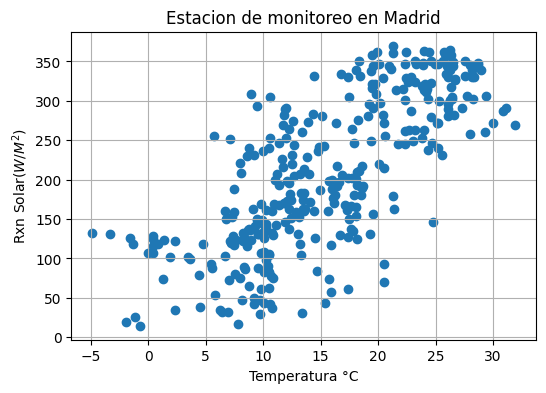

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

axes.scatter(temp_prom, rxn)
axes.set_xlabel("Temperatura °C")
axes.set_ylabel(r"Rxn Solar$(W/M^{2})$")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
plt.show()

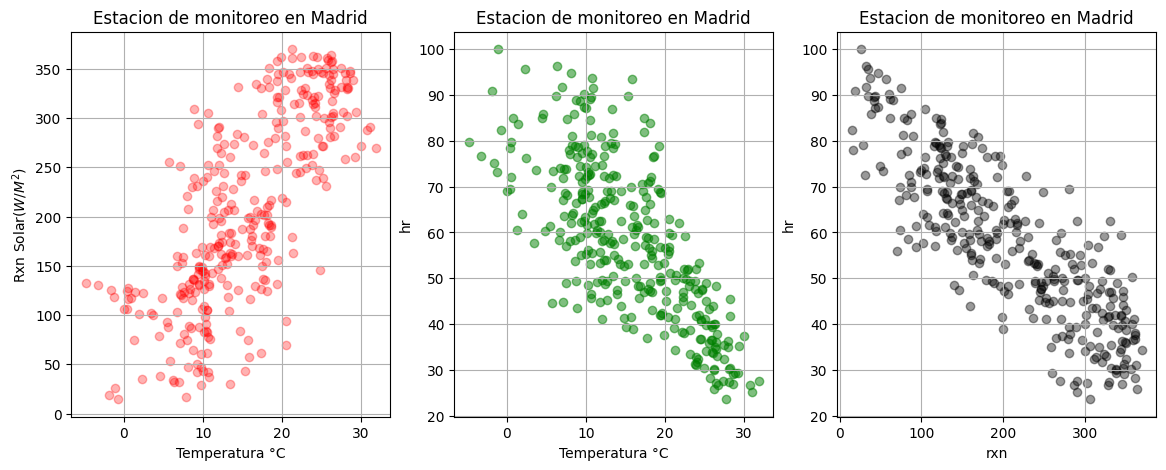

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
fig.subplots_adjust(hspace=0.06)

ax[0].scatter(temp_prom, rxn, c="r", alpha=0.3)
ax[0].set_xlabel("Temperatura °C")
ax[0].set_ylabel(r"Rxn Solar$(W/M^{2})$")
ax[0].set_title("Estacion de monitoreo en Madrid")
ax[0].grid(True)

ax[1].scatter(temp_prom, hr, c="green", alpha=0.5)
ax[1].set_xlabel("Temperatura °C")
ax[1].set_ylabel(r"hr")
ax[1].set_title("Estacion de monitoreo en Madrid")
ax[1].grid(True)

ax[2].scatter(rxn, hr, c="black", alpha=0.4)
ax[2].set_xlabel(r"rxn")
ax[2].set_ylabel("hr")
ax[2].set_title("Estacion de monitoreo en Madrid")
ax[2].grid(True)

 Si el gráfico de dispersión entre `rxn` y `temp_prom` no muestra una relación claramente lineal, podrías considerar transformaciones de las variables (por ejemplo, logaritmos, raíces cuadradas) o modelos no lineales si la relación subyacente es curvilínea.

## 3.2. Independencia de las observaciones

 **Descripción:**

 Los errores (residuos) deben ser independientes entre sí, es decir, no debe haber correlación entre ellos.

 **Implicación de Incumplimento:**

 Si hay autocorrelación (común en series de tiempo), la precisión de los coeficientes y las pruebas de hipótesis se ve afectada.


### Prueba de Hipótesis de Durbin-Watson

La prueba de Durbin-Watson es una prueba estadística que se utiliza para detectar la presencia de **autocorrelación** en los residuos de un análisis de regresión.

**¿Qué es la Autocorrelación?**

La autocorrelación ocurre cuando los residuos de un modelo de regresión no son independientes entre sí, sino que están correlacionados secuencialmente. Esto es particularmente común en datos de series de tiempo (como tus datos meteorológicos) donde una observación en un momento dado puede estar relacionada con observaciones anteriores o posteriores.

**Descripción de la Prueba:**

El estadístico de Durbin-Watson ($d$) se calcula a partir de los residuos del modelo de regresión. El valor de $d$ siempre estará entre 0 y 4.

*   **Valores cercanos a 2:** Indican que no hay autocorrelación en los residuos. Este es el escenario ideal para los supuestos de la regresión lineal.
*   **Valores significativamente menores que 2 (típicamente por debajo de 1.5):** Sugieren **autocorrelación positiva**. Esto significa que un residuo positivo tiende a ser seguido por otro residuo positivo, y un residuo negativo tiende a ser seguido por otro residuo negativo.
*   **Valores significativamente mayores que 2 (típicamente por encima de 2.5):** Sugieren **autocorrelación negativa**. Esto significa que un residuo positivo tiende a ser seguido por un residuo negativo, y viceversa.

**¿Para qué sirve la Prueba de Durbin-Watson?**

La prueba de Durbin-Watson es importante porque la autocorrelación en los residuos viola uno de los supuestos clave de la regresión lineal clásica: la independencia de los errores.

Si hay autocorrelación y no se aborda:

*   Las estimaciones de los coeficientes de regresión ($\beta_0$, $\beta_1$) seguirán siendo insesgadas, pero **no serán eficientes** (tendrán una mayor varianza).
*   Los errores estándar de los coeficientes estarán **subestimados** si hay autocorrelación positiva o **sobreestimados** si hay autocorrelación negativa.
*   Esto lleva a que los intervalos de confianza sean demasiado estrechos (en caso de autocorrelación positiva) o demasiado amplios (en caso de autocorrelación negativa), y a que las pruebas de hipótesis (p-valores) sean incorrectas, lo que puede llevar a conclusiones erróneas sobre la significancia estadística de las variables predictoras.

En resumen, la prueba de Durbin-Watson te ayuda a diagnosticar un problema potencial en tu modelo de regresión (la autocorrelación de los residuos) que puede afectar la validez de tus inferencias estadísticas.

In [107]:
def pruebaHipotesis_durbinWatson(resultado):
  # Calculate the Durbin-Watson statistic
  durbin_watson_statistic = sm.stats.durbin_watson(resultado.resid)

  print(f"Estadístico Durbin-Watson: {durbin_watson_statistic}")

  if durbin_watson_statistic < 1.5:
    print("Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.")
  elif durbin_watson_statistic > 2.5:
    print("Estadístico Durbin-Watson statistic mayor que 2.5: autocorrelación negativa.")
  else:
    print("Estadístico Durbin-Watson entre 1.5 y 2.5: autocorrelación no significativa.")

In [108]:
# Fit a simple linear regression model
modelo_rxn_temp = smf.ols('rxn_solar ~ temp_aire', data=df_excel).fit()

In [109]:
print(modelo_rxn_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              rxn_solar   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     417.5
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           1.15e-60
Time:                        18:28:09   Log-Likelihood:                -1862.3
No. Observations:                 334   AIC:                             3729.
Df Residuals:                     332   BIC:                             3736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.1267      7.960      7.679      0.0

In [110]:
print(modelo_rxn_temp.params["Intercept"])
print(modelo_rxn_temp.params["temp_aire"])

61.12665376323768
9.387255379972135


In [111]:
pruebaHipotesis_durbinWatson(modelo_rxn_temp)

Estadístico Durbin-Watson: 0.8018175807839815
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


El estadístico Durbin-Watson determina autocorrelación positiva. Para series de tiempo como datos meteorológicos, esto es común. Se pdría considerar modelos de series de tiempo que tengan en cuenta esta dependencia temporal (por ejemplo, modelos AR, MA, ARMA, ARIMA)

In [112]:
# Fit a simple linear regression model for hr vs rxn
model_hr_rxn = smf.ols('hr ~ rxn_solar', data=df_excel).fit()

In [113]:
pruebaHipotesis_durbinWatson(model_hr_rxn)

Estadístico Durbin-Watson: 0.8993755341695832
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


In [114]:
# Fit a simple linear regression model for hr vs temp_prom
model_hr_temp = smf.ols('hr ~ temp_aire', data=df_excel).fit()

In [115]:
pruebaHipotesis_durbinWatson(model_hr_temp)

Estadístico Durbin-Watson: 0.590678731081639
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


## 3.3. Ausencia de valores atípicos

Los outliers pueden afectar significativamente el modelo

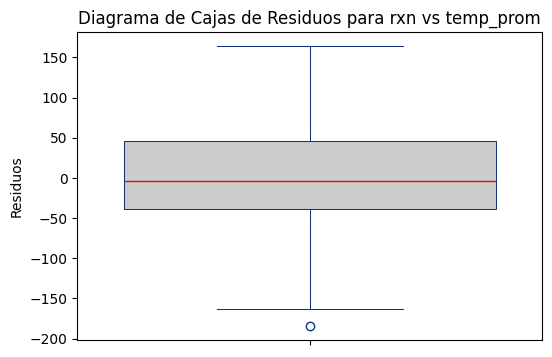

In [116]:
# Create a box plot of the residuals
plt.figure(figsize=(6, 4))
sns.boxplot(y=modelo_rxn_temp.resid,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},)

plt.ylabel("Residuos")
plt.title("Diagrama de Cajas de Residuos para rxn vs temp_prom")
plt.show()

##  3.4. Normalidad de los residuos

**Descripción:**

Los errores (residuos) deben seguir una distribución normal (o Gaussiana) con media cero.

**Implicación de Incumplimiento:**

Importante para la inferencia estadística (pruebas t, intervalos de confianza). Menos crítico para la predicción si el tamaño de la muestra es grande.

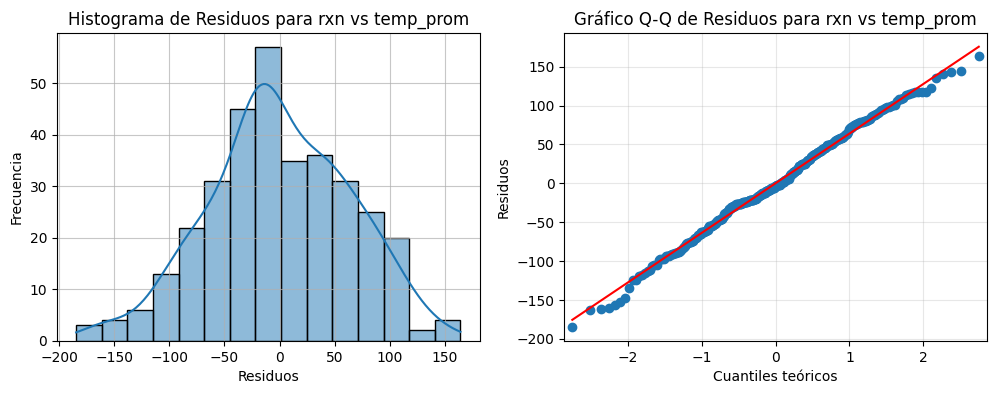

In [117]:
# Crear gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
sns.histplot(modelo_rxn_temp.resid, kde=True, ax=axes[0])
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title("Histograma de Residuos para rxn vs temp_prom")
axes[0].grid(alpha=0.7)

# Gráfico 2: Residuos
sm.qqplot(modelo_rxn_temp.resid, line='s', ax=axes[1])
axes[1].set_xlabel('Cuantiles teóricos')
axes[1].set_ylabel('Residuos')
axes[1].set_title("Gráfico Q-Q de Residuos para rxn vs temp_prom")
axes[1].grid(alpha=0.3)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

In [118]:
datos_no_normal = np.random.exponential(scale=20, size=500) # scale(media)=10, sd=10, size(tamaño) = 5000

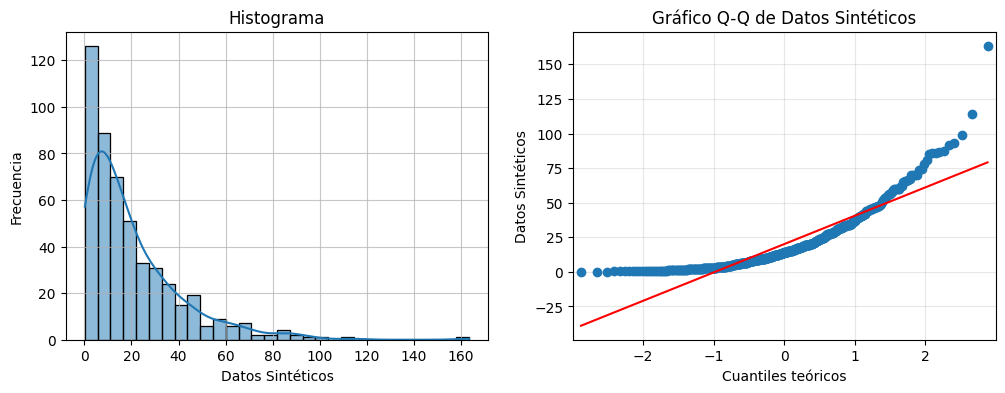

In [119]:
# Crear gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
sns.histplot(datos_no_normal, kde=True, ax=axes[0])
axes[0].set_xlabel('Datos Sintéticos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title("Histograma")
axes[0].grid(alpha=0.7)

# Gráfico 2: Residuos
sm.qqplot(datos_no_normal, line='s', ax=axes[1])
axes[1].set_xlabel('Cuantiles teóricos')
axes[1].set_ylabel('Datos Sintéticos')
axes[1].set_title("Gráfico Q-Q de Datos Sintéticos")
axes[1].grid(alpha=0.3)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

## 3.5. Homocedasticidad

**Descripción:**

La varianza de los errores (residuos) debe ser constante para todos los valores de la variable independiente ($X$).

**Implicación de Incumplimiento:**

La varianza de los errores cambia (heterocedasticidad), lo que puede distorsionar los intervalos de confianza y las pruebas de hipótesis.

Análisis e Interpretación del Gráfico de Residuos vs. Valores Ajustados

El gráfico de dispersión de Residuos vs. Valores Ajustados (`Residuos` en el eje Y y `Valores Ajustados` en el eje X) que acabas de generar es una herramienta visual clave para evaluar el supuesto de **homocedasticidad** en un modelo de regresión lineal.

**Homocedasticidad:** Este supuesto establece que la varianza de los errores (residuos) debe ser constante para todos los niveles de la variable independiente o, en este caso, para todos los valores predichos por el modelo.

**Interpretación del Gráfico:**

*   **Si el supuesto de homocedasticidad se cumple:** Los puntos en el gráfico de residuos vs. valores ajustados deberían mostrar una dispersión aleatoria alrededor de la línea horizontal en cero, sin ningún patrón discernible. La "nube" de puntos debería tener un ancho aproximadamente constante a lo largo del eje X.

*   **Si el supuesto de homocedasticidad NO se cumple (Heterocedasticidad):** Los puntos mostrarán un patrón sistemático. Los patrones comunes que indican heterocedasticidad incluyen:
    *   **Forma de Cono (ensanchándose o estrechándose):** Si la dispersión de los residuos aumenta o disminuye a medida que aumentan los valores ajustados, sugiere heterocedasticidad. Un "cono" que se ensancha hacia la derecha indica que la varianza del error aumenta con los valores predichos, mientras que un cono que se estrecha indica que disminuye.
    *   **Otras formas:** Patrones curvilíneos o agrupaciones también pueden indicar heterocedasticidad.

**Implicaciones de la Heterocedasticidad:**

Si el supuesto de homocedasticidad se viola y existe heterocedasticidad:

*   Las estimaciones de los coeficientes de regresión siguen siendo insesgadas, pero **no son eficientes** (tienen una mayor varianza).
*   Los errores estándar de los coeficientes estarán **sesgados**, lo que invalida las pruebas de hipótesis (p-valores) y los intervalos de confianza. Esto significa que podrías concluir erróneamente que una variable es estadísticamente significativa (o no) o que tus intervalos de confianza son más precisos de lo que realmente son.

**Posibles Pasos a Seguir si hay Heterocedasticidad:**

Si el gráfico sugiere heterocedasticidad, podrías considerar:

1.  **Transformaciones de la variable dependiente:** Aplicar una transformación matemática a la variable dependiente (`rxn`), como el logaritmo o la raíz cuadrada, a veces puede ayudar a estabilizar la varianza.
2.  **Regresión Robusta:** Utilizar métodos de regresión robusta que no asumen homocedasticidad.
3.  **Errores Estándar Robusto (White Standard Errors):** En `statsmodels`, puedes usar errores estándar robustos que corrigen la heterocedasticidad sin necesidad de transformar los datos o cambiar el modelo. Esto corrige los errores estándar y, por lo tanto, las pruebas de hipótesis y los intervalos de confianza, aunque no mejora la eficiencia de las estimaciones de los coeficientes.

Si el gráfico de residuos vs. valores ajustados muestra un patrón (forma de cono, por ejemplo), indica heterocedasticidad. Esto significa que la varianza de los errores no es constante. Puedes intentar transformaciones de la variable dependiente o usar métodos de regresión robusta.

In [120]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos
n = 100  # Número de puntos
x = np.linspace(0, 10, n)  # Variable independiente
beta_0 = 2.0  # Intercepto
beta_1 = 3.0  # Pendiente

# Generar errores con heterocedasticidad (varianza creciente con x)
error_scale = 0.5 * x  # Escala de la varianza proporcional a x
errors = np.random.normal(0, error_scale, n)  # Errores con distribución normal

# Generar variable dependiente
y = beta_0 + beta_1 * x + errors  # Modelo lineal con errores

# crear data frame
df_xy = pd.DataFrame()
df_xy["x"] = x
df_xy["y"] = y
print(df_xy.head(n=5))

         x         y
0  0.00000  2.000000
1  0.10101  2.296047
2  0.20202  2.671484
3  0.30303  3.139853
4  0.40404  3.164818


In [121]:
# Ajustar modelo de regresión lineal
modelo_xy = smf.ols('y ~ x', data=df_xy).fit()

beta_1 = modelo_xy.params["x"]
beta_0 = modelo_xy.params["Intercept"]

y_pred =  beta_1 * x + beta_0 # Valores predichos
residuals = modelo_xy.resid

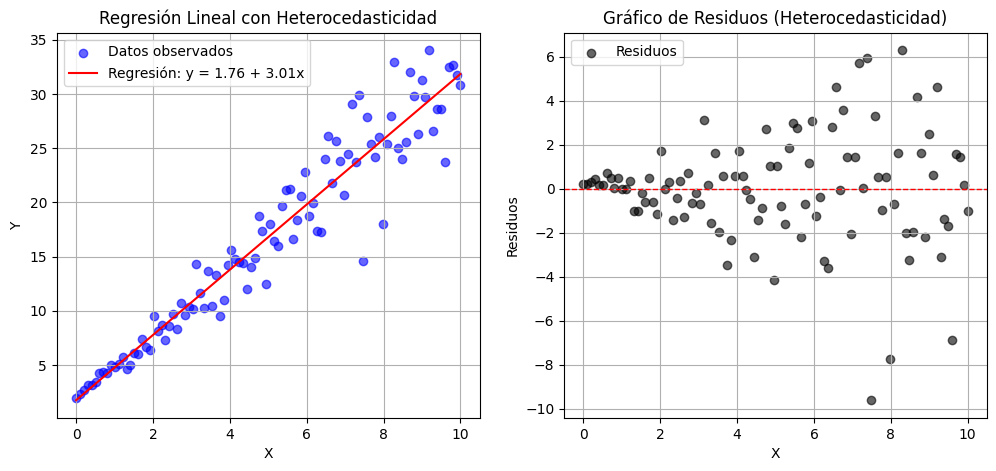

In [122]:
# Crear gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
ax[0].scatter(x, y, color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(x, y_pred, color='red', label=f'Regresión: y = {beta_0:.2f} + {beta_1:.2f}x')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Regresión Lineal con Heterocedasticidad')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos
ax[1].scatter(x, residuals, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Residuos')
ax[1].set_title('Gráfico de Residuos (Heterocedasticidad)')
ax[1].legend()
ax[1].grid(True)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

In [123]:
# Fijar semilla para reproducibilidad
np.random.seed(42)

# Parámetros del modelo
n = 100  # Número de observaciones
beta_0 = 5  # Intercepto
beta_1 = 2  # Pendiente
sigma = 3  # Desviación estándar del error (homocedasticidad)

# Generar datos sintéticos
X = np.random.uniform(0, 10, n)  # Variable independiente (uniforme entre 0 y 10)
epsilon = np.random.normal(0, sigma, n)  # Errores homocedásticos
Y = beta_0 + beta_1 * X + epsilon  # Variable dependiente

# crear data frame
df_XY = pd.DataFrame()
df_XY["X"] = X
df_XY["Y"] = Y

In [124]:
# Ajustar modelo de regresión lineal
modelo_XY = smf.ols('Y ~ X', data=df_XY).fit()

BETA_1 = modelo_XY.params["X"]
BETA_0 = modelo_XY.params["Intercept"]

Y_pred = modelo_XY.params["Intercept"] + modelo_XY.params["X"] * X  # Valores predichos
residuals = modelo_XY.resid

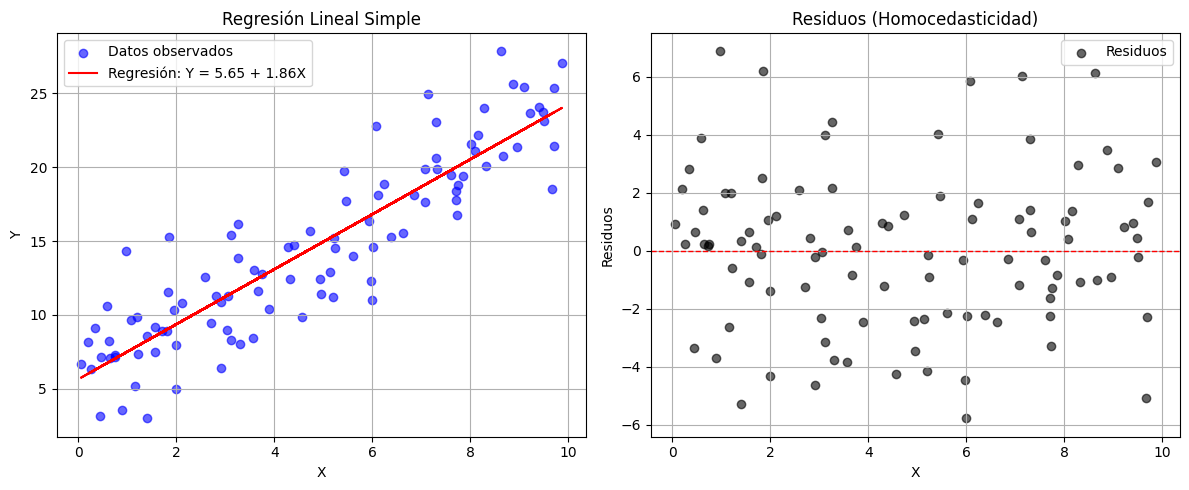

In [125]:
# Graficar datos observados y línea de regresión
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos y línea de regresión
ax[0].scatter(X, Y, color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(X, Y_pred, color='red', label=f'Regresión: Y = {BETA_0:.2f} + {BETA_1:.2f}X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Regresión Lineal Simple')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos para verificar homocedasticidad
ax[1].scatter(X, residuals, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Residuos')
ax[1].set_title('Residuos (Homocedasticidad)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Análisis de `rxn` vs `temp_prom`:**

Observando el gráfico que generaste (`aacb917b`), fíjate en la distribución de los puntos. Si la dispersión de los residuos no es uniforme a lo largo de los valores ajustados, esto sugiere que la varianza de los errores no es constante. Por ejemplo, si los residuos son más dispersos para valores ajustados altos que para valores ajustados bajos (formando una especie de cono que se abre hacia la derecha), indicaría heterocedasticidad.

In [126]:
# Obtener residuos y valores ajustados del modelo
residuos = modelo_rxn_temp.resid
valores_ajustado = modelo_rxn_temp.fittedvalues

In [127]:
pendiente = modelo_rxn_temp.params["temp_aire"]
coeficiente = modelo_rxn_temp.params["Intercept"]

y_pred =  pendiente * df_excel["temp_aire"] + coeficiente # Valores predichos

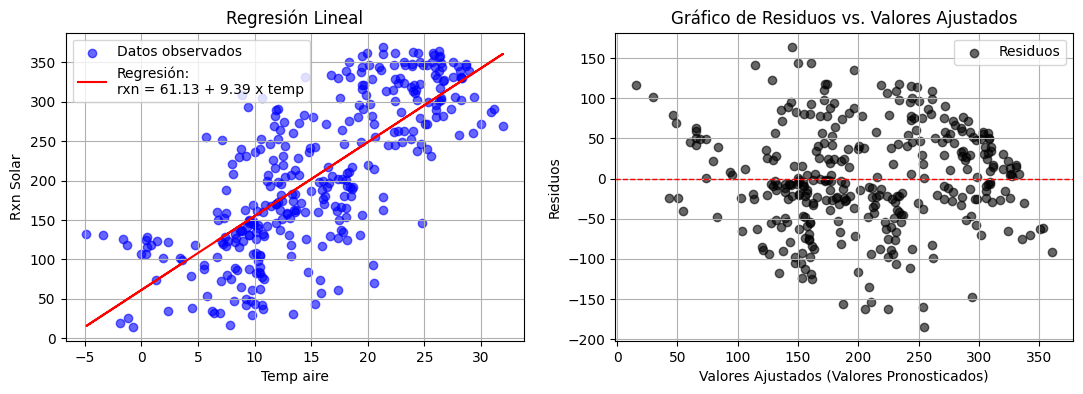

In [128]:
# Crear gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
ax[0].scatter(df_excel["temp_aire"], df_excel["rxn_solar"], color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(df_excel["temp_aire"], y_pred, color='red', label=f'Regresión:\nrxn = {coeficiente:.2f} + {pendiente:.2f} x temp')
ax[0].set_xlabel('Temp aire')
ax[0].set_ylabel('Rxn Solar')
ax[0].set_title('Regresión Lineal')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos
ax[1].scatter(valores_ajustado, residuos, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Valores Ajustados (Valores Pronosticados)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
ax[1].legend()
ax[1].grid(True)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

# **IV. Modelo de regresión logística binaria**

La regresión logística binaria  es un modelo estadístico que predice la probabilidad de un resultado en una variable de dos categorías, basándose en una o más variables independientes. Se emplea para clasificar, explicar o predecir, y es una herramienta común en campos como medicina, finanzas y ciencias sociales.




**¿Para que sirve?**

Sirve para modelar la relación entre una o más **variables independientes** (predictoras) y una **variable dependiente categórica** (la que queremos predecir). La variable dependiente suele ser binaria (con dos categorías, como sí/no, verdadero/falso, 0/1).


**Verificar y abordar Supuestos del Modelo para un caso estudio de Anemia**

Para implementar un modelo de **regresión logística binaria** con una base de datos de anemia, utilizando **Dx_Definitivo** como variable dependiente y **Edad** y **Sexo** como variables independientes, es fundamental que cada variable cumpla con los siguientes supuestos y condiciones específicas:

<ul>
  <li>Tamaño muestral sufuciente.</li>
  <li>La variable dependiente tiene que ser binaria.</li>
  <li>Independencia de las observaciones.</li>
</ul>

Antes de abordar cada uno de los supuestos y condiciones que deben cumplir las variables dependientes e independientes, primero se describe la función logística.

## 4.1. Función logística

El modelo de regresión logística binaria utiliza una función logística para modelar la probabilidad de un resultado, la relación matemática general para la probabilidad predicha viene definida en la ecuación {eq}`eq:regresionLogisticaBinaria`.

$$ P(y) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}\times x_{1} + \beta_{2}\times x_{2})}}$$(eq:regresionLogisticaBinaria)

Donde:

* $y$ es la variable dependiente.
* Las variables predictoras $x_{1}$, $x_{2}$ tienen que ser linealmente independientes.

* $\beta_0, \beta_1$ y $\beta_2$ son coeficientes estimados.

Para el caso estudio de anemia la función logística se define a través de la ecuación {eq}`eq:regresionLogisticaBinariaAnemia`. Donde, `Tipo_Dx` será la variable dependiente y `Edad` y `Sexo` serán las variables linealmente independinetes predictoras.

$$ P(Tipo\_Dx) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}\times Edad + \beta_{2}\times Sexo)}}$$(eq:regresionLogisticaBinariaAnemia)

## 4.2. Tamaño muestral suficiente

Se recomienda un número adecuado de observaciones por categoría de la variable dependiente (generalmente al menos 10 eventos por variable independiente para estimaciones estables).

In [129]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248893 entries, 0 to 248892
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sexo            248893 non-null  object 
 1   id_persona      248893 non-null  int64  
 2   Edad            248893 non-null  int64  
 3   Tipo_edad       248893 non-null  object 
 4   id_ubigeo       243110 non-null  float64
 5   Fecha_atencion  248893 non-null  int64  
 6   Etapa           248893 non-null  object 
 7   Diagnostico     248893 non-null  float64
 8   Tipo_Dx         248893 non-null  object 
 9   Lab             248893 non-null  object 
 10  id_eess         248893 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 20.9+ MB
None


In [130]:
print(df_csv.isna().sum())

Sexo                 0
id_persona           0
Edad                 0
Tipo_edad            0
id_ubigeo         5783
Fecha_atencion       0
Etapa                0
Diagnostico          0
Tipo_Dx              0
Lab                  0
id_eess              0
dtype: int64


## 4.3. Variable dependiente binaria
La variable dependiente debe tener solo dos categorías (p. ej., 0 y 1, o "sí" y "no").

In [131]:
print(df_csv["Tipo_Dx"].value_counts())

Tipo_Dx
D    248398
R       454
P        41
Name: count, dtype: int64


In [132]:
# Filtrar el DataFrame para excluir las filas donde 'Tipo_Dx' es 'R'
df_Dx_sinR = df_csv[df_csv["Tipo_Dx"] != "R"]

# Mostrar las counts de la columna 'Tipo_Dx' en el nuevo DataFrame para verificar
print(df_Dx_sinR["Tipo_Dx"].value_counts())

Tipo_Dx
D    248398
P        41
Name: count, dtype: int64


In [142]:
df_Dx_sinR["Dx_Definitivo"] = (df_Dx_sinR["Tipo_Dx"] == "D").astype(int)
print(df_Dx_sinR["Dx_Definitivo"].value_counts())

Dx_Definitivo
1    248398
0        41
Name: count, dtype: int64


/tmp/ipython-input-2493932122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dx_sinR["Dx_Definitivo"] = (df_Dx_sinR["Tipo_Dx"] == "D").astype(int)


## 4.4. Independencia de las observaciones

Las observaciones deben ser independientes entre sí (sin correlación entre casos, como en datos repetidos o longitudinales sin ajustar).

### Independencia entre variables categóricas (Tipo_Dx y Sexo)

Para evaluar la independencia entre dos variables categóricas como `Tipo_Dx` y `Sexo`, podemos utilizar la prueba de independencia Chi-cuadrado ($\chi^2$).

**Hipótesis de la prueba:**

*   **Hipótesis Nula ($H_0$):** Las variables `Tipo_Dx` y `Sexo` son independientes. No hay asociación entre el tipo de diagnóstico y el sexo.
*   **Hipótesis Alternativa ($H_1$):** Las variables `Tipo_Dx` y `Sexo` no son independientes. Existe una asociación entre el tipo de diagnóstico y el sexo.

Realizaremos la prueba utilizando la función `chi2_contingency` de la librería `scipy.stats`.

In [134]:
print(df_Dx_sinR["Tipo_Dx"].value_counts())

Tipo_Dx
D    248398
P        41
Name: count, dtype: int64


In [135]:
# Crear una tabla de contingencia de Tipo_Dx y Sexo
contingency_table = pd.crosstab(df_Dx_sinR['Tipo_Dx'], df_csv['Sexo'])
print("Tabla de Contingencia (Tipo_Dx vs Sexo):")
print(contingency_table)

Tabla de Contingencia (Tipo_Dx vs Sexo):
Sexo          F       M
Tipo_Dx                
D        122359  126039
P            26      15


In [136]:
# Realizar la prueba de independencia Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")
print(f"Grados de libertad (dof): {dof}")

Estadístico Chi-cuadrado: 2.7444
Valor p: 0.0976
Grados de libertad (dof): 1


In [137]:
# Interpretar el resultado
alpha = 0.05
if p < alpha:
    print(f"\nEl valor p ({p:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula.")
    print("Existe una asociación significativa entre Tipo_Dx y Sexo.")
else:
    print(f"\nEl valor p ({p:.4f}) es mayor que el nivel de significancia ({alpha}).")
    print("No rechazamos la hipótesis nula.")
    print("No hay evidencia suficiente para decir que existe una asociación significativa entre Tipo_Dx y Sexo.")


El valor p (0.0976) es mayor que el nivel de significancia (0.05).
No rechazamos la hipótesis nula.
No hay evidencia suficiente para decir que existe una asociación significativa entre Tipo_Dx y Sexo.


### Independencia entre una variable categórica y una continua (Sexo y Edad)

Para evaluar la independencia entre una variable categórica (`Sexo`) y una variable continua (`Edad`), podemos visualizar la distribución de la variable continua para cada categoría de la variable categórica. Un diagrama de cajas (boxplot). **Si las distribuciones de `Edad` son similares para ambos sexos, sugiere independencia; si son diferentes, sugiere dependencia.**

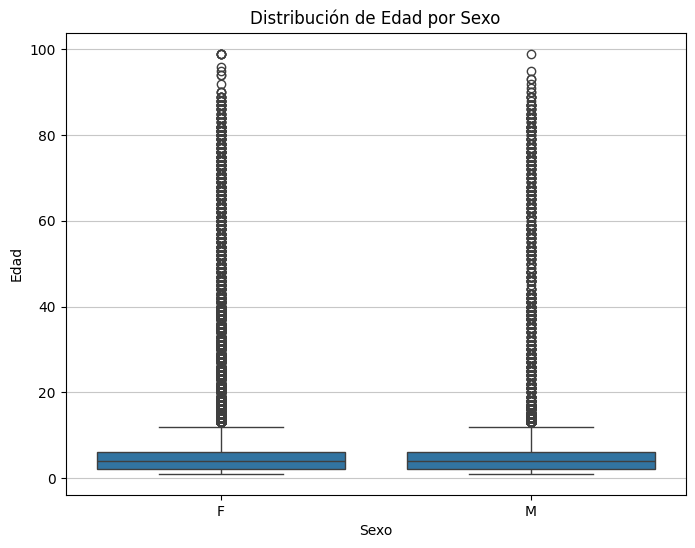

In [138]:
# Crear un diagrama de cajas para Edad por Sexo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sexo', y='Edad', data = df_Dx_sinR)
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Sexo')
plt.grid(axis='y', alpha=0.7)
plt.show()

Ejemplo de dependencia entre una variable categórica y una variable contínua usando datos sintéticos.

In [139]:
# Generar datos sintéticos para demostrar dependencia entre Edad y Sexo
np.random.seed(42) # para reproducibilidad

# Número de observaciones por categoría de sexo
n_femenino = 100
n_masculino = 100

# Generar edades para mujeres (con una distribución diferente, por ejemplo, menor media)
edad_femenino = np.random.normal(loc=30, scale=10, size=n_femenino) # Media 30, desviación estándar 10

# Generar edades para hombres (con una distribución diferente, por ejemplo, mayor media)
edad_masculino = np.random.normal(loc=40, scale=12, size=n_masculino) # Media 40, desviación estándar 12

# Crear Series de Sexo
sexo_femenino = pd.Series(['F'] * n_femenino)
sexo_masculino = pd.Series(['M'] * n_masculino)

# Combinar los datos en un DataFrame
df_sintetico_sexo_edad = pd.DataFrame({
    'Edad': np.concatenate([edad_femenino, edad_masculino]),
    'Sexo': np.concatenate([sexo_femenino, sexo_masculino])
})

# Mostrar las primeras filas del DataFrame sintético
print("DataFrame Sintético (Edad vs Sexo):")
print(df_sintetico_sexo_edad.head())

DataFrame Sintético (Edad vs Sexo):
        Edad Sexo
0  34.967142    F
1  28.617357    F
2  36.476885    F
3  45.230299    F
4  27.658466    F


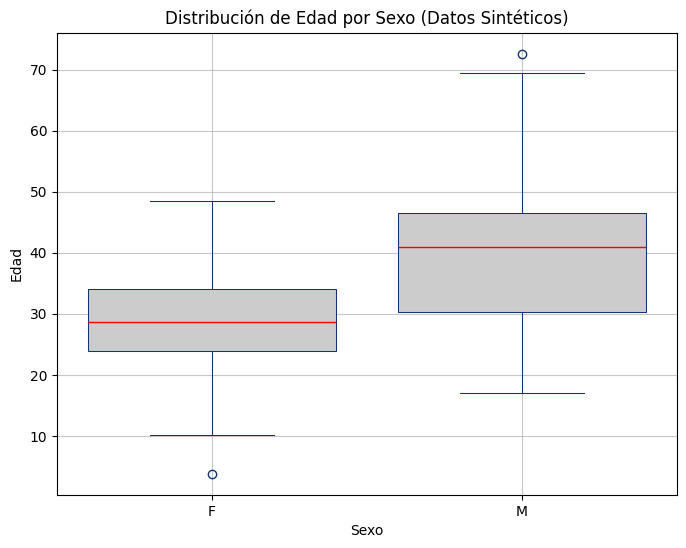

In [140]:
# Crear un diagrama de cajas para visualizar la dependencia
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sexo', y='Edad', data=df_sintetico_sexo_edad,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},)
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Sexo (Datos Sintéticos)')
plt.grid(axis='both', alpha=0.7)
plt.show()

**Análisis e interpretación**
<ul>
  <li><b>Diferencia en la Mediana</b>: La línea que representa la mediana de la Edad es diferente para cada Sexo. En este caso sintético, la mediana de la Edad para el Sexo Masculino es visiblemente mayor que la mediana para el Sexo Femenino.</li>
  <li><b>Diferencia en la dispersión</b>:La longitud de la caja (que representa el rango intercuartil, donde se encuentra el 50% central de los datos) y la extensión de los bigotes son diferentes. En este gráfico, la dispersión de la Edad es ligeramente mayor para el sexo Masculino, lo que refleja la mayor desviación estándar.</li>
  <li><b>Valores atípicos</b>: Los puntos individuales fuera de los bigotes representan valores atípicos. Su presencia y distribución también pueden diferir entre las categorias.</li>
</ul>

**Conclusión**

Dado que las distribuciones de la variable "Edad" son claramente diferentes entre las categorías de la variable "Sexo" (diferentes medianas y dispersiones), este gráfico de cajas demuestra visualmente una dependencia o asociación entre la Edad y el Sexo en estos datos sintéticos. Si las distribuciones fueran muy similares, sugeriría independencia.

Este tipo de visualización es útil para evaluar la independencia entre una variable continua y una categórica antes de incluirlas en modelos como la regresión logística.



### Independencia entre una variable categórica y una continua (Tipo_Dx y Edad)

De manera similar, para evaluar la independencia entre `Tipo_Dx` (categórica binaria, usando `Dx_Definitivo` que creamos previamente) y `Edad` (continua), podemos usar un diagrama de cajas. Una diferencia en la distribución de `Edad` entre las categorías de `Dx_Definitivo` (`0` y `1`) sugeriría dependencia.

In [154]:
print(df_Dx_sinR["Dx_Definitivo"].value_counts())

Dx_Definitivo
1    248398
0        41
Name: count, dtype: int64


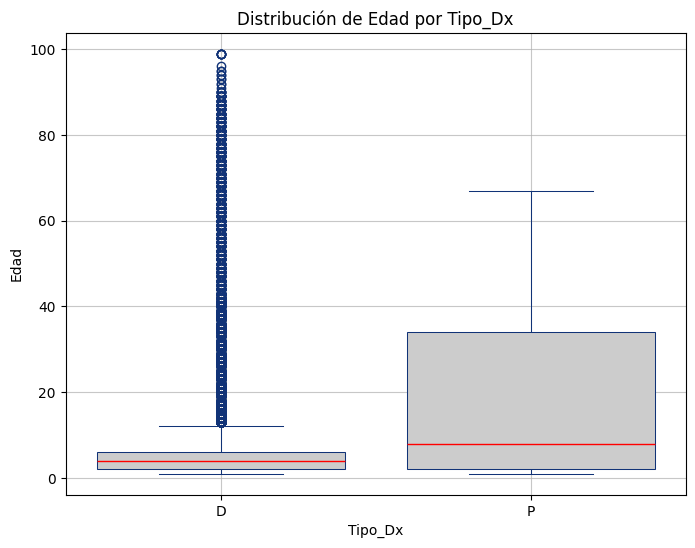

In [155]:
# Crear un diagrama de cajas para Edad por Dx_Definitivo
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tipo_Dx', y='Edad', data=df_Dx_sinR,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},)

plt.xlabel('Tipo_Dx')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Tipo_Dx')
plt.grid(axis='both', alpha=0.7)
plt.show()

### Análisis e Interpretación de la Separación Perfecta en la figura "Distribución de Edad por Tipo_Dx"

La **separación perfecta** (o separación completa) en el contexto de la regresión logística ocurre cuando una o más variables independientes pueden predecir el resultado de la variable dependiente binaria con un 100% de precisión. En otras palabras, existe un valor o rango de valores de la variable independiente que divide perfectamente a las observaciones en las dos categorías de la variable dependiente.

En el caso de la figura "Distribución de Edad por Tipo_Dx", que muestra la distribución de la variable continua `Edad` para las dos categorías de `Tipo_Dx` (que ahora es binaria, esencialmente "D" y "P" después de filtrar "R"), la separación perfecta ocurriría si:

1.  **No hay superposición en las distribuciones de Edad:** Si el rango de edades para el grupo con `Tipo_Dx = D` y el rango de edades para el grupo con `Tipo_Dx = P` no se solaparan en absoluto. Por ejemplo, si todas las personas con `Tipo_Dx = D` tuvieran edades entre 0 y 10 años, y todas las personas con `Tipo_Dx = P` tuvieran edades entre 20 y 80 años, habría una separación perfecta basada en la Edad.
2.  **Un punto de corte claro:** Existiría un valor de edad específico (un punto de corte) por encima o por debajo del cual todas las observaciones pertenecerían a una sola categoría de `Tipo_Dx`.

**Cómo la figura ayuda a evaluar la separación perfecta:**

El diagrama de cajas te permite evaluar visualmente si existe esta separación perfecta:

*   **Superposición de las cajas y bigotes:** Si las cajas (que representan el 50% central de los datos) y/o los bigotes (que se extienden para cubrir la mayor parte de los datos dentro de un rango razonable) de las dos categorías de `Tipo_Dx` se superponen significativamente, como parece ser el caso en tu figura, esto **indica que NO hay separación perfecta** basada únicamente en la variable `Edad`. Hay individuos con edades similares en ambos grupos de diagnóstico.
*   **Ausencia de superposición:** Si las cajas y bigotes estuvieran completamente separados en el eje Y (Edad), sugeriría una posible separación perfecta o casi perfecta.

**Implicaciones de la Separación Perfecta en la Regresión Logística:**

La separación perfecta es un problema para la estimación en la regresión logística porque los algoritmos de máxima verosimilitud utilizados para estimar los coeficientes del modelo no convergen. Los coeficientes para las variables que causan la separación se vuelven infinitos, y los errores estándar asociados son muy grandes. Esto hace que el modelo no se pueda ajustar correctamente.

En tu figura, dado que las cajas se superponen, puedes concluir visualmente que la variable `Edad` por sí sola **no causa separación perfecta** en la variable `Tipo_Dx`. Esto es una buena noticia para proceder con el modelo de regresión logística que incluye `Edad` como predictor.

## 4.5. Modelo de regresión logística binaria

In [157]:
print(df_Dx_sinR[["Dx_Definitivo", "Tipo_Dx", "Sexo", "Edad"]].head())

   Dx_Definitivo Tipo_Dx Sexo  Edad
0              1       D    F    20
1              1       D    F     2
2              1       D    M     1
3              1       D    F    19
4              1       D    M     3


In [158]:
modelo = smf.logit("Dx_Definitivo ~ Edad + C(Sexo)", data=df_Dx_sinR).fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.001502
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          Dx_Definitivo   No. Observations:               248439
Model:                          Logit   Df Residuals:                   248436
Method:                           MLE   Df Model:                            2
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                 0.06241
Time:                        19:06:41   Log-Likelihood:                -373.24
converged:                       True   LL-Null:                       -398.08
Covariance Type:            nonrobust   LLR p-value:                 1.620e-11
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0062      0.229     39.329      0.000       8.557       9.455
C(Sexo)[T.M]     0.437

In [159]:
# Obtener las predicciones del modelo para los datos de entrenamiento
df_f = df_Dx_sinR[df_Dx_sinR["Sexo"] == "F"]
df_m = df_Dx_sinR[df_Dx_sinR["Sexo"] == "M"]

y_pred_f = modelo.predict(df_f)
y_pred_m = modelo.predict(df_m)

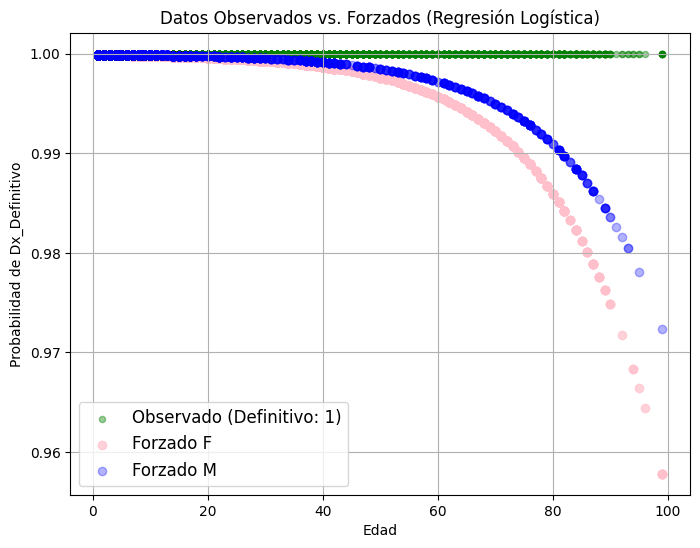

In [168]:
# Crear un gráfico de dispersión con los datos observados y forzados
fig, ax = plt.subplots(figsize=(8, 6)) # Ajustar el tamaño de la figura si es necesario

ax.scatter(df_Dx_sinR["Edad"][df_Dx_sinR["Dx_Definitivo"] == 1],
            df_Dx_sinR["Dx_Definitivo"][df_Dx_sinR["Dx_Definitivo"] == 1],
            color='green', label='Observado (Definitivo: 1)', alpha=0.4, s=20)

ax.scatter(df_f["Edad"], y_pred_f, color="pink",label="Forzado F", alpha=0.7)  # Datos forzados (predichos)
ax.scatter(df_m["Edad"], y_pred_m, color="b", label="Forzado M", alpha=0.3)  # Datos forzados (predichos)

ax.set_xlabel("Edad")
ax.set_ylabel("Probabilidad de Dx_Definitivo")
ax.set_title("Datos Observados vs. Forzados (Regresión Logística)")
ax.legend( loc='lower left', fontsize='large') # loc: lower, upper:left, right, center
ax.grid(True)

**Referencias**
> <a href="https://link.springer.com/article/10.1186/s12889-024-18338-8">Lyu, Y., Xu, Q., & Liu, J. (2024). Exploring the medical decision-making patterns and influencing factors among the general Chinese public: a binary logistic regression analysis. BMC public health, 24(1), 887.</a>

> <a href="https://www.nature.com/articles/s41598-023-49872-x">Talin, I. A., Abid, M. H., Samad, M. A., Domínguez Azpíroz, I., de la Torre Diez, I., Ashraf, I., & Nahid, A. A. (2023). Exploring factors influencing the severity of pregnancy anemia in India: a study using proportional odds model. Scientific Reports, 13(1), 22816.</a>

> <a href="https://sjuoz.uoz.edu.krd/index.php/sjuoz/article/view/442">Abdulqader, Q. M. (2017). Applying the binary logistic regression analysis on the medical data. Science Journal of University of Zakho, 5(4), 330-334.</a>

> <a href="https://pmc.ncbi.nlm.nih.gov/articles/PMC4419893/">Avali, V. R., Cooper, G. F., & Gopalakrishnan, V. (2014, November). Application of Bayesian logistic regression to mining biomedical data. In AMIA Annual Symposium Proceedings (Vol. 2014, p. 266)</a>

><a href="https://www.bioestadistica.uma.es/apuntesMaster/regresi%C3%B3n-log%C3%ADstica-binaria.html">Apuntes de Estadística</a>